# Temporal Analysis of Philadelphia Crime Data (2006-2018)

In this section, we delve into the temporal patterns of crime in Philadelphia, analyzing data spanning from 2006 to 2018. Our objective is to uncover trends over different time scales – by hour, day, month, and year. This analysis will help us understand how crime rates fluctuate over time, revealing patterns that could be pivotal for crime prevention strategies and law enforcement planning.

We will explore:
- **Hourly Trends**: How does crime vary throughout a day?
- **Daily Trends**: Are certain days of the week more prone to crime?
- **Monthly Trends**: What are the monthly variations in crime rates?
- **Yearly Trends**: How has crime evolved over the years?

This comprehensive temporal analysis aims to provide a detailed overview of the dynamics of crime incidents in Philadelphia, offering insights that go beyond mere numbers to understand the rhythm of the city's safety and security challenges.

Data was provided by https://www.opendataphilly.org/

### Quick Overview of Crime Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
%matplotlib inline
incidents = pd.read_csv('../data/crime.csv')
incidents.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


### Crime Trends by Year

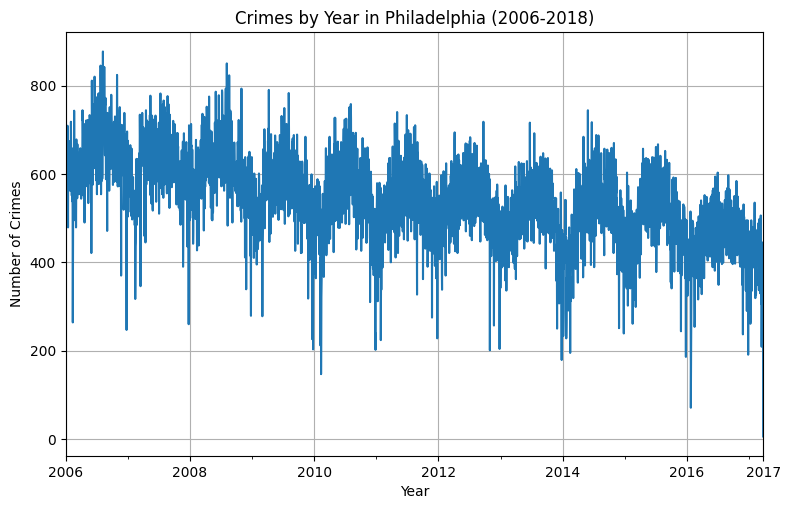

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Ensure Dispatch_Date is a datetime dtype and Year is extracted as a separate column
incidents['Dispatch_Date'] = pd.to_datetime(incidents['Dispatch_Date'])
incidents['Year'] = incidents['Dispatch_Date'].dt.year

# Group by Dispatch_Date and get the count of incidents
by_date = incidents.groupby(incidents['Dispatch_Date'].dt.to_period("D")).size().reset_index(name='Total')

# Convert Dispatch_Date from Period to DateTime for plotting
by_date['Dispatch_Date'] = by_date['Dispatch_Date'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(9, 5.5))
by_date.plot(x='Dispatch_Date', y='Total', ax=ax, legend=False)

# Formatting the plot to have a similar style to the R ggplot example
ax.set_title('Crimes by Year in Philadelphia (2006-2018)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes')
ax.grid(True)

# Set x-axis formatter for dates
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

plt.show()



Seasonal Patterns: There seem to be regular fluctuations within each year, which could suggest seasonal trends in crime rates
Annual Trends: The plot indicate crime rates have  decreased over the years in general

### Crime Trends by Month

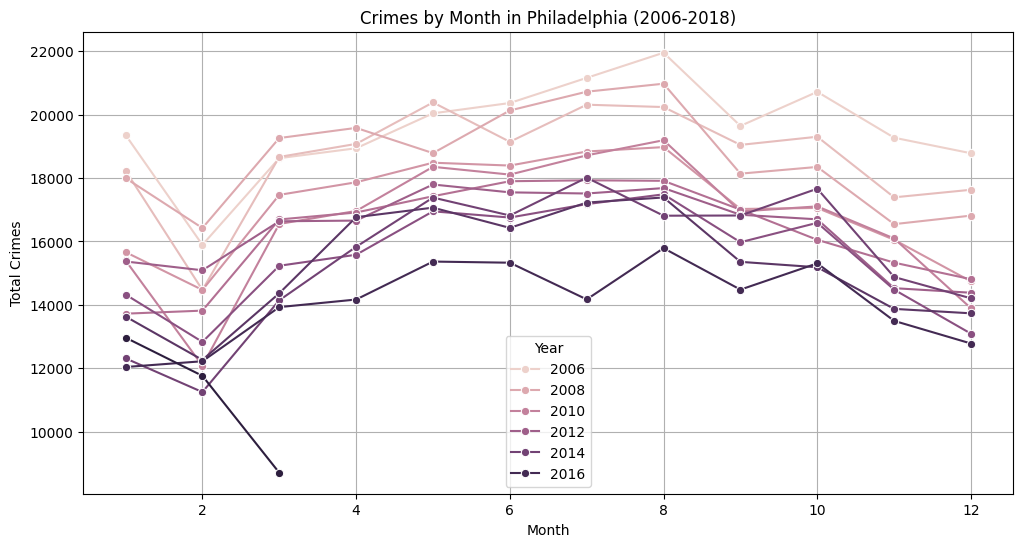

In [5]:
incidents['Dispatch_Date'] = pd.to_datetime(incidents['Dispatch_Date'])
incidents['Year'] = incidents['Dispatch_Date'].dt.year
incidents['Month'] = incidents['Dispatch_Date'].dt.month

# Group by Month and Year, and count incidents
monthly_counts = incidents.groupby(['Year', 'Month']).size().reset_index(name='Total')

# Plotting Crimes by Month over the years
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='Month', y='Total', hue='Year', marker='o', ax=ax)

# Formatting the plot to have a similar style to the R ggplot example
ax.set_title('Crimes by Month in Philadelphia (2006-2018)')
ax.set_xlabel('Month')
ax.set_ylabel('Total Crimes')
ax.grid(True)
ax.legend(title='Year')

plt.show()

Seasonal Trends: Again, there seems to be a pattern that repeats annually, suggesting seasonal trends in crime rates. 

Month-to-Month Variability: seems like in winter there are less crime incidents, the peak happens in August, around summer.


### Crime Trends by Days Within a Week

/var/folders/tf/c5gvkllj6dn72kwhbbxxgcm40000gn/T/ipykernel_13175/4114548526.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_counts, x='DayOfWeek', y='Total', palette='viridis')


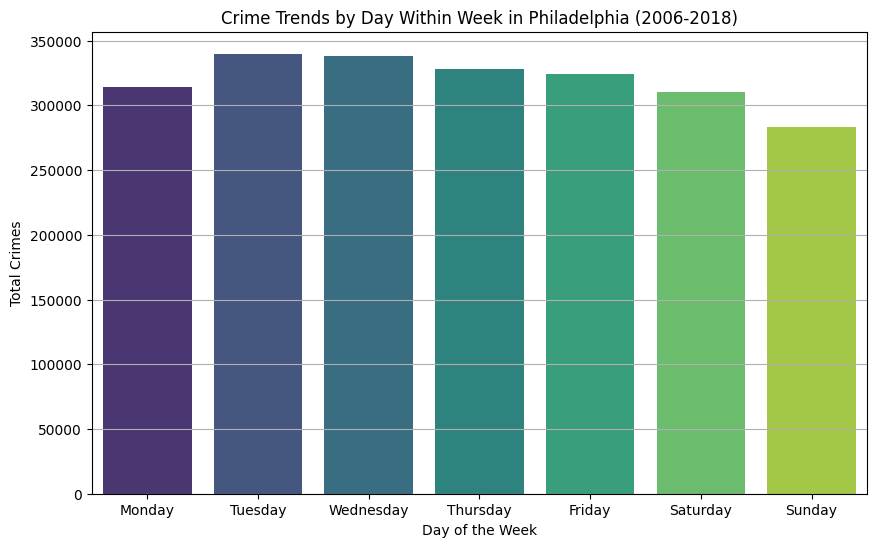

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


incidents['Dispatch_Date'] = pd.to_datetime(incidents['Dispatch_Date'])

# Extract day of the week from Dispatch_Date (0=Monday, 6=Sunday)
incidents['DayOfWeek'] = incidents['Dispatch_Date'].dt.dayofweek

# Group by day of the week and count incidents
daily_counts = incidents.groupby('DayOfWeek').size().reset_index(name='Total')

# Sort the data by DayOfWeek to maintain the order from Monday to Sunday
daily_counts.sort_values('DayOfWeek', inplace=True)

# Plotting Crimes by Day of the Week
plt.figure(figsize=(10,6))
sns.barplot(data=daily_counts, x='DayOfWeek', y='Total', palette='viridis')

# Set the x-axis labels to day names
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title('Crime Trends by Day Within Week in Philadelphia (2006-2018)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Crimes')
plt.grid(True, axis='y')
plt.show()


Did not find a pattern here

### Crime Trends by Days Within a Month

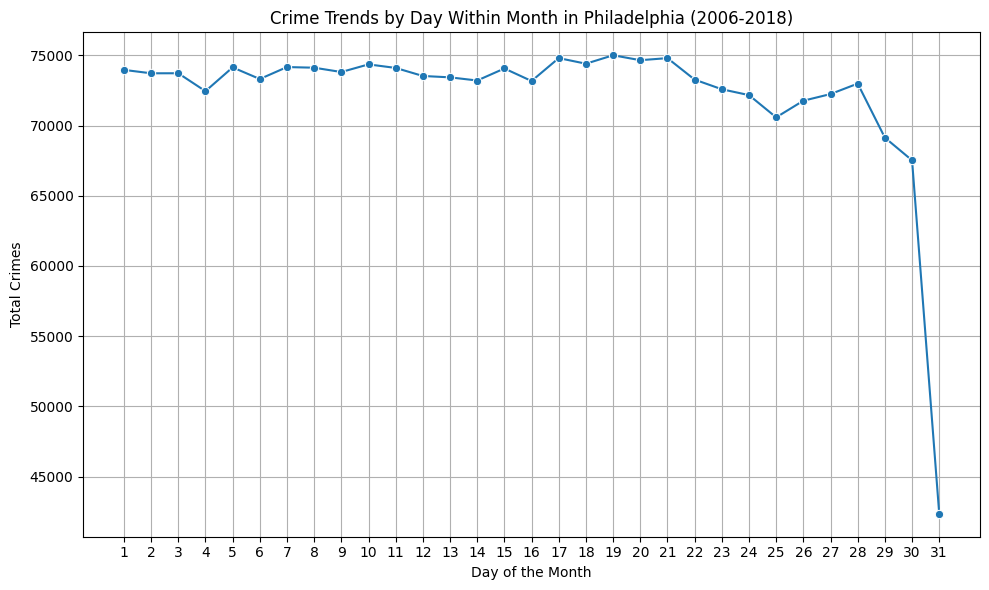

In [7]:
incidents['Dispatch_Date'] = pd.to_datetime(incidents['Dispatch_Date'])
incidents['DayOfMonth'] = incidents['Dispatch_Date'].dt.day

# Group by day of the month and count incidents
daily_counts = incidents.groupby('DayOfMonth').size().reset_index(name='Total')

# Plotting Crimes by Day of the Month
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_counts, x='DayOfMonth', y='Total', marker='o')

plt.title('Crime Trends by Day Within Month in Philadelphia (2006-2018)')
plt.xlabel('Day of the Month')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.xticks(range(1, 32))  # Set x-ticks to show each day of the month
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()



### Crimes by Hour

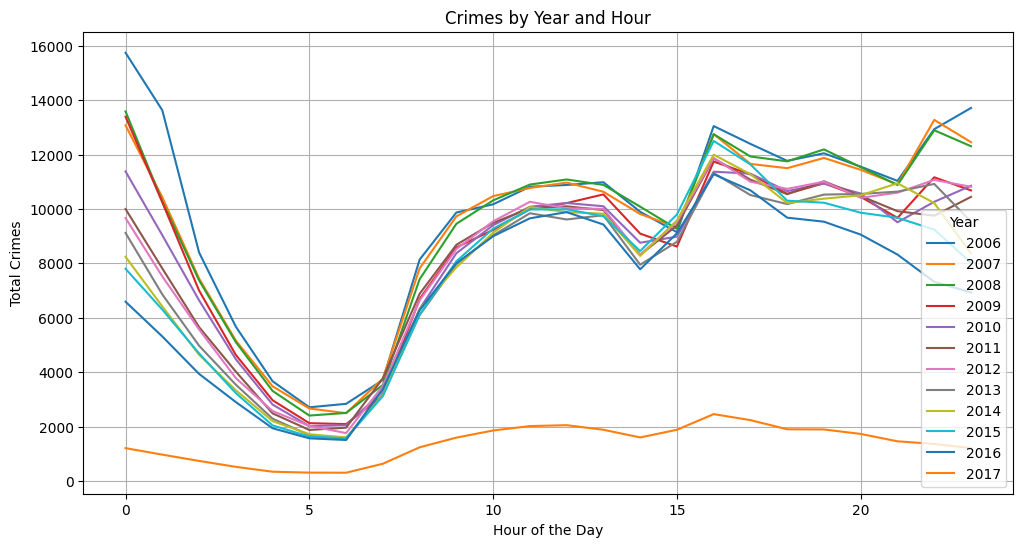

In [10]:
incidents['Dispatch_Date_Time'] = pd.to_datetime(incidents['Dispatch_Date_Time'])

# Extract Year and Hour from Dispatch_Date_Time
incidents['Year'] = incidents['Dispatch_Date_Time'].dt.year
incidents['Hour'] = incidents['Dispatch_Date_Time'].dt.hour

# Group by Year to get the total number of crimes each year
by_year = incidents.groupby('Year').size().reset_index(name='Total')
by_year['Percent'] = (by_year['Total'] / by_year['Total'].sum()) * 100

# Group by Year and Hour to get the total number of crimes for each hour across each year
by_hour_year = incidents.groupby(['Year', 'Hour']).size().reset_index(name='Total')


# Plotting Crimes by Hour across Years
plt.figure(figsize=(12, 6))
for year in by_hour_year['Year'].unique():
    subset = by_hour_year[by_hour_year['Year'] == year]
    plt.plot(subset['Hour'], subset['Total'], label=str(year))

plt.title('Crimes by Year and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Crimes')
plt.legend(title='Year')
plt.grid(True)
plt.show()

Seems like crimes are more likely to happend at night (from 10pm to 1am), it decreases afterwards and reaches the lowest point around 6am in the morning. During the day, it increases again.

### Crimes by Code, Crime type

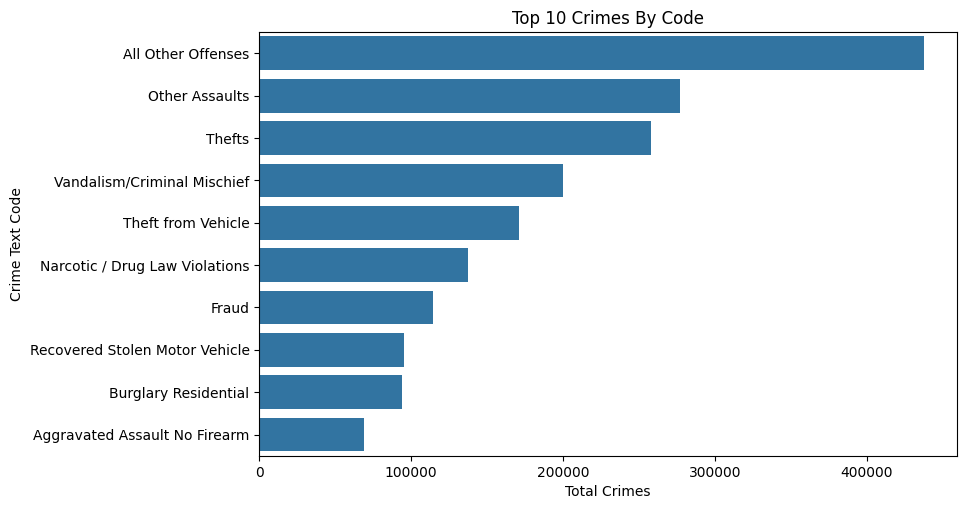

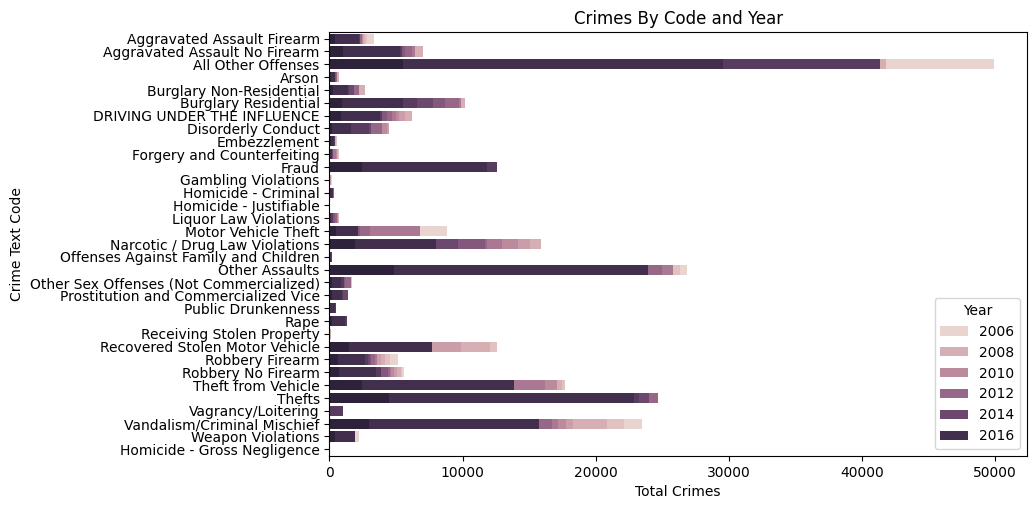

In [12]:
incidents['Dispatch_Date_Time'] = pd.to_datetime(incidents['Dispatch_Date_Time'])
incidents['Year'] = incidents['Dispatch_Date_Time'].dt.year
incidents['Hour'] = incidents['Dispatch_Date_Time'].dt.hour

# Group by 'Text_General_Code' to get the total number of crimes for each code
by_code = incidents.groupby('Text_General_Code').size().reset_index(name='Total')
by_code = by_code.sort_values(by='Total', ascending=False)

# Plotting top 10 Crimes by Code
plt.figure(figsize=(9, 5.5))
sns.barplot(x='Total', y='Text_General_Code', data=by_code.head(10))
plt.title('Top 10 Crimes By Code')
plt.xlabel('Total Crimes')
plt.ylabel('Crime Text Code')
plt.show()

# Group by 'Year' and 'Text_General_Code' to get the total number of crimes for each code and year
by_code_year = incidents.groupby(['Year', 'Text_General_Code']).size().reset_index(name='Total')

# Plotting Crimes by Code and Year
plt.figure(figsize=(9, 5.5))
sns.barplot(x='Total', y='Text_General_Code', hue='Year', data=by_code_year, dodge=False)
plt.title('Crimes By Code and Year')
plt.xlabel('Total Crimes')
plt.ylabel('Crime Text Code')
plt.legend(title='Year', loc='lower right')
plt.show()

Thefts are the most common type of crimes and it is increasing over years
Vandalism is decreasing